In [1]:
import xml.dom.minidom

import datetime as dt

import matplotlib.pyplot as plt

import xml.sax



Number of GO terms(DOM):
biological_process: 30794
molecular_function: 12154
cellular_component: 4392
Time consumed for DOM:0:00:09.911432


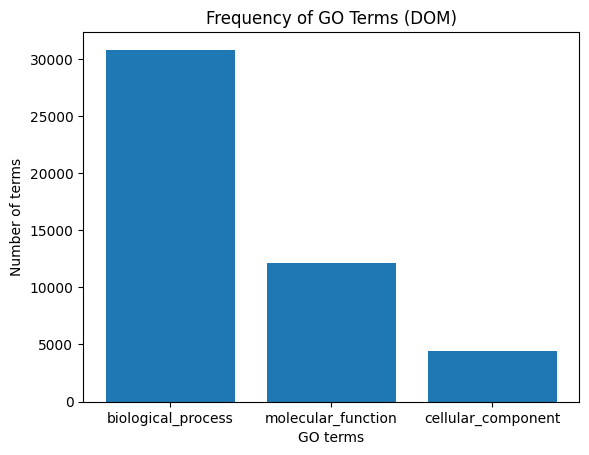

In [2]:
start=dt.datetime.now() 
DOMTree = xml.dom.minidom.parse("go_obo.xml")
root = DOMTree.documentElement
terms = root.getElementsByTagName('term')

bp=0
mf=0
cc=0

for term in terms:
    term_namespace=term.getElementsByTagName('namespace')[0].firstChild.nodeValue
    if  term_namespace=="biological_process":
        bp+=1
    elif  term_namespace=="cellular_component":
        cc+=1
    elif term_namespace=="molecular_function":
        mf+=1
    
print("Number of GO terms(DOM):")
print("biological_process: "+str(bp))
print("molecular_function: "+str(mf))
print("cellular_component: "+str(cc))

end=dt.datetime.now() 
print("Time consumed for DOM:"+ str(end-start))


x=['biological_process','molecular_function','cellular_component']
y= [bp,mf,cc]

plt.figure()
plt.xlabel("GO terms") 
plt.ylabel("Number of terms") 
plt.title("Frequency of GO Terms (DOM)") 
plt.bar(x,y) 
plt.show()

    

In [3]:

start=dt.datetime.now() 

parser = xml.sax.make_parser()
parser.parse('go_obo.xml')


class go_Handler(xml.sax.ContentHandler):
    def __init__(self):
        self.current_element = ""
        self.namespace_counts = {
            'biological_process': 0,
            'molecular_function': 0,
            'cellular_component': 0
        }

    def startElement(self, tag, attributes):
        self.current_element = tag
        if tag == "term":
            self.in_term = True

    def characters(self, content):
        if self.current_element == "namespace":
            if content in self.namespace_counts:
                self.namespace_counts[content] += 1

    def counter(self):
        return self.namespace_counts
      
Handler = go_Handler()

parser.setContentHandler(Handler)

parser.setFeature(xml.sax.handler.feature_namespaces, 0)

parser.parse('go_obo.xml')

go_counts =      Handler.counter()

end=dt.datetime.now() 

print("Number of GO terms(SAX):")
print(go_counts)

print("Time consumed for SAX:"+ str(end-start))







Number of GO terms(SAX):
{'biological_process': 30784, 'molecular_function': 12149, 'cellular_component': 4391}
Time consumed for SAX:0:00:02.704706


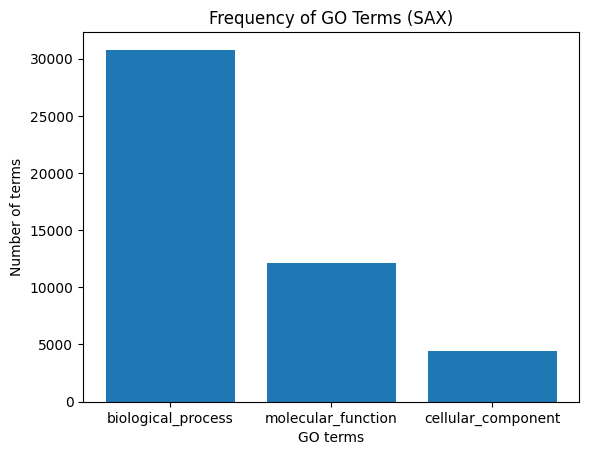

In [4]:



plt.figure()
plt.xlabel("GO terms") 
plt.ylabel("Number of terms") 
plt.title("Frequency of GO Terms (SAX)") 
plt.bar(go_counts.keys(),go_counts.values()) 
plt.show()

